<a href="https://colab.research.google.com/github/nshamid/Klasterisasi-Potensi-Ekonomi-Kecamatan/blob/main/Klaterisasi_Potensi_Ekonomi_Kecamatan_di_Kota_Palembang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Klasterisasi Potensi Ekonomi Kecamatan di Kota Palembang 2025***

## **Teknik Informatika Bilingual 2023, Fakultas Ilmu Komputer, Universitas Sriwijaya**

### Mata Kuliah: Kerja Praktik (FTI4001)
### Dosen Pengampu: Yunita, S.Si., M.Cs.
### Dosen Pembimbing Lapangan:  Aharmisa Rahmatullah, S.ST

### Anggota Kelompok:


1.   Nabilah Shamid (09021382328147)
2.   Saravina Zharfa Kelana P (09021382328149)
3.   Azka Hukma Tsabita (09021382328163)


## **Dataset Information**

**Dataset:** Potensi Ekonomi Kecamatan Kota Palembang Tahun 2025  

**Sumber Data:**  
- Publikasi *Kota Palembang Dalam Angka 2025*  
- Statistik Potensi Desa (PODES) Kota Palembang  

**Deskripsi Dataset:**  
Dataset Potensi Ekonomi Kecamatan Kota Palembang Tahun 2025 menyajikan informasi mengenai kondisi sosial ekonomi dan infrastruktur pendukung di setiap kecamatan di Kota Palembang. Dataset ini bertujuan untuk menganalisis dan mengelompokkan (klasterisasi) kecamatan berdasarkan tingkat potensi ekonomi wilayah dengan mempertimbangkan aspek kependudukan, fasilitas pendidikan dan kesehatan, aktivitas perdagangan, industri, inklusi keuangan, serta aksesibilitas transportasi.

Dataset ini digunakan sebagai dasar dalam pembangunan dashboard visualisasi klaster potensi ekonomi kecamatan di Kota Palembang.

**Jumlah Data:**  
Dataset terdiri dari **18 sampel (baris)** yang merepresentasikan seluruh kecamatan di Kota Palembang, dengan **10 variabel (kolom)** yang digunakan sebagai indikator potensi ekonomi.

---

### Fitur (Atribut) Dataset

| Fitur | Keterangan |
|------|-----------|
| `kecamatan` | Nama kecamatan di Kota Palembang yang menjadi unit analisis |
| `jumlah_penduduk` | Jumlah penduduk yang berdomisili di masing-masing kecamatan |
| `kepadatan_penduduk` | Kepadatan penduduk per km² di setiap kecamatan |
| `sarana_pendidikan` | Jumlah seluruh fasilitas pendidikan (TK, SD, SMP, SMA/SMK, perguruan tinggi) |
| `sarana_kesehatan` | Jumlah seluruh fasilitas kesehatan (rumah sakit, puskesmas, klinik, apotek, dan fasilitas kesehatan lainnya) |
| `sarana_perdagangan_jasa` | Jumlah fasilitas perdagangan dan jasa modern (minimarket, restoran, hotel, dan penginapan) |
| `pasar_dan_pertokoan` | Jumlah pasar tradisional dan kelompok pertokoan yang tersedia |
| `transportasi_dan_aksesibilitas` | Jumlah desa/kelurahan yang memiliki angkutan umum dan angkutan online |
| `bank_dan_koperasi` | Jumlah lembaga keuangan berupa bank dan koperasi |
| `imk_dan_sentra` | Jumlah industri mikro dan kecil serta sentra industri |

---

**Catatan:**  
Seluruh variabel numerik dalam dataset akan dilakukan proses normalisasi sebelum analisis klasterisasi untuk menghindari dominasi variabel tertentu akibat perbedaan skala data.

## **Import Libraries**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

# Setting untuk visualisasi
%matplotlib inline
sns.set(style="whitegrid")

## **Load Dataset**

In [89]:
df = pd.read_csv("Dataset Potensi Ekonomi Kecamatan di Kota Palembang 2025.csv")

display(df.head())

,Kecamatan,Jumlah Penduduk,Kepadatan Penduduk,Sarana Pendidikan,Sarana Kesehatan,Transportasi,Sarana Perdagangan dan Jasa,Keberadaan Pasar dan Pertokoan,Bank dan Koperasi,IKM dan Sentra
0,Alang-Alang Lebar,116.594,4.824,16,25,8,13,10,7,4
1,Bukit Kecil,38.195,16.048,19,26,12,17,10,12,7
2,Gandus,83.882,1.690,20,28,10,11,8,4,6
3,Ilir Barat I,154.738,3.854,30,45,12,22,11,10,6
4,Ilir Barat II,69.871,16.716,21,28,14,15,5,2,9


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Kecamatan                       18 non-null     object 
 1   Jumlah Penduduk                 18 non-null     float64
 2   Kepadatan Penduduk              18 non-null     float64
 3   Sarana Pendidikan               18 non-null     int64  
 4   Sarana Kesehatan                18 non-null     int64  
 5   Transportasi                    18 non-null     int64  
 6   Sarana Perdagangan dan Jasa     18 non-null     int64  
 7   Keberadaan Pasar dan Pertokoan  18 non-null     int64  
 8   Bank dan Koperasi               18 non-null     int64  
 9   IKM dan Sentra                  18 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.5+ KB


In [91]:
df.isnull().sum()

,0
Kecamatan,0
Jumlah Penduduk,0
Kepadatan Penduduk,0
Sarana Pendidikan,0
Sarana Kesehatan,0
Transportasi,0
Sarana Perdagangan dan Jasa,0
Keberadaan Pasar dan Pertokoan,0
Bank dan Koperasi,0
IKM dan Sentra,0


## **Exploratory Data Analysis (EDA)**

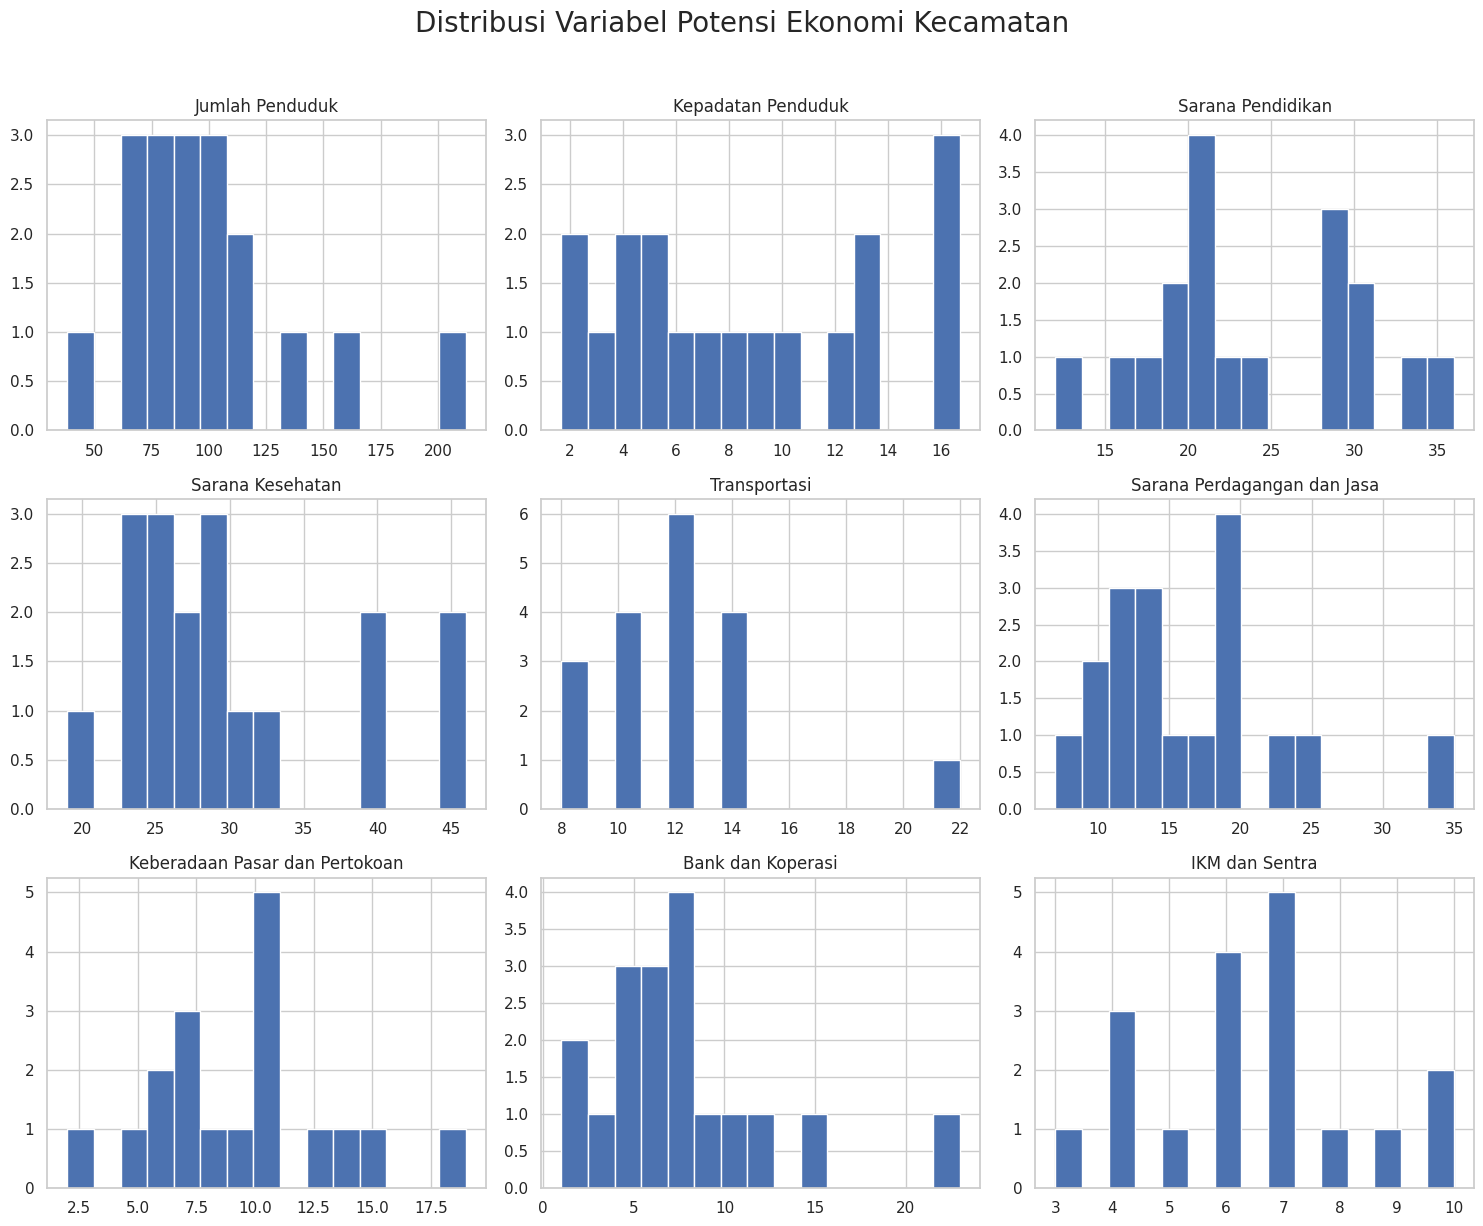

In [92]:
# Distribusi Variabel Numerik
axes = df.drop(columns=['Kecamatan']).hist(
    bins=15,
    layout=(3, 3),
    figsize=(15, 12),
    grid=True,
)
plt.suptitle("Distribusi Variabel Potensi Ekonomi Kecamatan", fontsize=20, y=1.02)
plt.tight_layout()

plt.show()

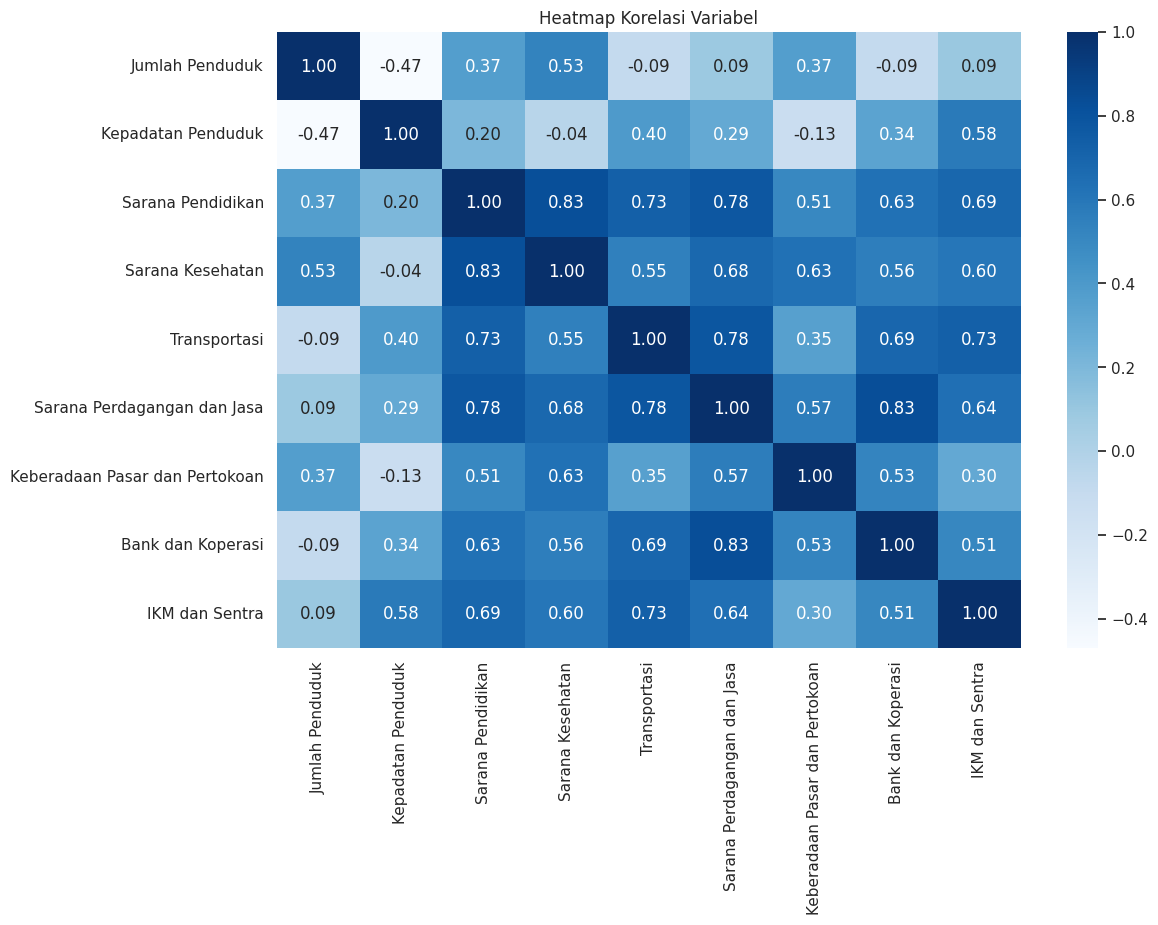

In [94]:
# Korelasi Antar Variabel
plt.figure(figsize=(12,8))
sns.heatmap(
    df.drop(columns=['Kecamatan']).corr(),
    annot=True,
    cmap='Blues',
    fmt='.2f'
)
plt.title("Heatmap Korelasi Variabel")
plt.show()

## **Data Prepocessing**

**Normalization**

In [95]:
df['Jumlah Penduduk'] = (df['Jumlah Penduduk'] * 1000).astype(int)
df['Kepadatan Penduduk'] = (df['Kepadatan Penduduk'] * 1000).astype(int)

df.head()

,Kecamatan,Jumlah Penduduk,Kepadatan Penduduk,Sarana Pendidikan,Sarana Kesehatan,Transportasi,Sarana Perdagangan dan Jasa,Keberadaan Pasar dan Pertokoan,Bank dan Koperasi,IKM dan Sentra
0,Alang-Alang Lebar,116594,4824,16,25,8,13,10,7,4
1,Bukit Kecil,38195,16047,19,26,12,17,10,12,7
2,Gandus,83882,1690,20,28,10,11,8,4,6
3,Ilir Barat I,154738,3854,30,45,12,22,11,10,6
4,Ilir Barat II,69871,16716,21,28,14,15,5,2,9


In [96]:
# Standardisasi Menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()

,Jumlah Penduduk,Kepadatan Penduduk,Sarana Pendidikan,Sarana Kesehatan,Transportasi,Sarana Perdagangan dan Jasa,Keberadaan Pasar dan Pertokoan,Bank dan Koperasi,IKM dan Sentra
0,0.438577,-0.745905,-1.200843,-0.641291,-1.230534,-0.467316,0.155424,-0.122185,-1.253566
1,-1.643023,1.562420,-0.737661,-0.507067,0.035158,0.133519,0.155424,0.877507,0.284901
2,-0.429971,-1.390443,-0.583267,-0.238620,-0.597688,-0.767734,-0.353236,-0.721999,-0.227921
3,1.451352,-0.945395,0.960675,2.043184,0.035158,0.884563,0.409753,0.477630,-0.227921
4,-0.801982,1.699801,-0.428873,-0.238620,0.668004,-0.166899,-1.116225,-1.121876,1.310547


## **Elbow Method & Silhouette Score**

In [110]:
# Elbow Method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

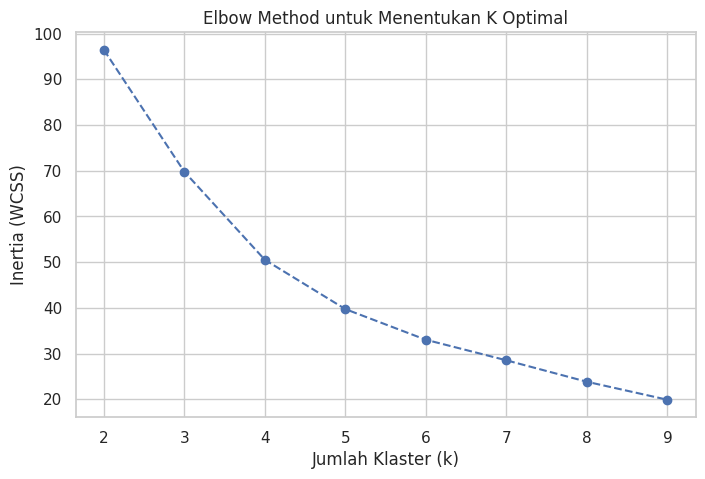

In [111]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()

In [112]:
# Silhouette Score
sil_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

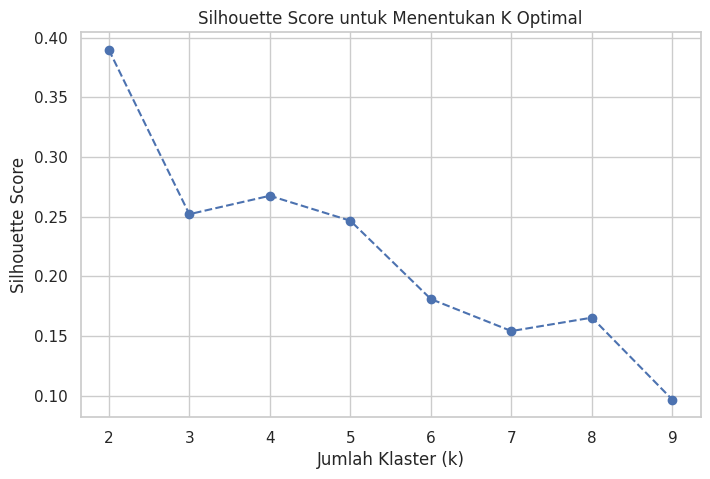

In [113]:
plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()

## **Model Pipeline & Clustering (K=3)**

In [115]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluasi Akhir
final_sil = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score Akhir untuk 3 Klaster: {final_sil:.4f}")

Silhouette Score Akhir untuk 3 Klaster: 0.2520


## **Profiling & Labelling**

In [116]:
# Hitung rata-rata setiap klaster untuk semua fitur
profiling = df.drop(columns='Kecamatan').groupby('Cluster').mean()

# Menentukan 'Potensi Ekonomi' berdasarkan jumlah rata-rata indikator ekonomi utama
profiling['Total_Score'] = profiling.sum(axis=1)
ranking = profiling['Total_Score'].sort_values().index

# Mapping otomatis: nilai terkecil = Rendah, terbesar = Tinggi
label_mapping = {
    ranking[0]: 'Potensi Rendah',
    ranking[1]: 'Potensi Menengah',
    ranking[2]: 'Potensi Tinggi'
}

df['Kategori_Potensi'] = df['Cluster'].map(label_mapping)

print("Hasil Profiling Rata-rata per Klaster:")
display(profiling)
print("\nJumlah Kecamatan per Kategori:")
print(df['Kategori_Potensi'].value_counts())

Hasil Profiling Rata-rata per Klaster:


,Jumlah Penduduk,Kepadatan Penduduk,Sarana Pendidikan,Sarana Kesehatan,Transportasi,Sarana Perdagangan dan Jasa,Keberadaan Pasar dan Pertokoan,Bank dan Koperasi,IKM dan Sentra,Total_Score
Cluster,,,,,,,,,,
0,128817.500000,8634.000000,32.750000,42.250000,15.000000,25.500000,14.750,14.250,8.25,137604.250000
1,83073.125000,11878.250000,24.125000,27.250000,12.250000,15.875000,7.375,6.625,7.00,95051.875000
2,103585.333333,3758.833333,17.333333,24.833333,9.333333,10.166667,8.500,4.500,4.50,107423.333333



Jumlah Kecamatan per Kategori:
Kategori_Potensi
Potensi Rendah      8
Potensi Menengah    6
Potensi Tinggi      4
Name: count, dtype: int64


In [126]:
# Mengurutkan berdasarkan kategori agar rapi (Tinggi -> Menengah -> Rendah)
kategori_urut = ['Potensi Tinggi', 'Potensi Menengah', 'Potensi Rendah']

for kat in kategori_urut:
    # Filter kecamatan berdasarkan kategori
    list_kecamatan = df[df['Kategori_Potensi'] == kat]['Kecamatan'].values

    print(f"\n> {kat} ({len(list_kecamatan)} Kecamatan):")
    for i, nama in enumerate(list_kecamatan, 1):
        print(f"  {i}. {nama}")


> Potensi Tinggi (4 Kecamatan):
  1. Ilir Barat I
  2. Ilir Timur I
  3. Kemuning
  4. Sukarami

> Potensi Menengah (6 Kecamatan):
  1. Alang-Alang Lebar
  2. Gandus
  3. Kalidoni
  4. Kertapati
  5. Sako
  6. Sematang Borang

> Potensi Rendah (8 Kecamatan):
  1. Bukit Kecil
  2. Ilir Barat II
  3. Ilir Timur II
  4. Ilir Timur III
  5. Jakabaring
  6. Plaju
  7. Seberang Ulu I
  8. Seberang Ulu II


## **Visualization PCA (2D)**

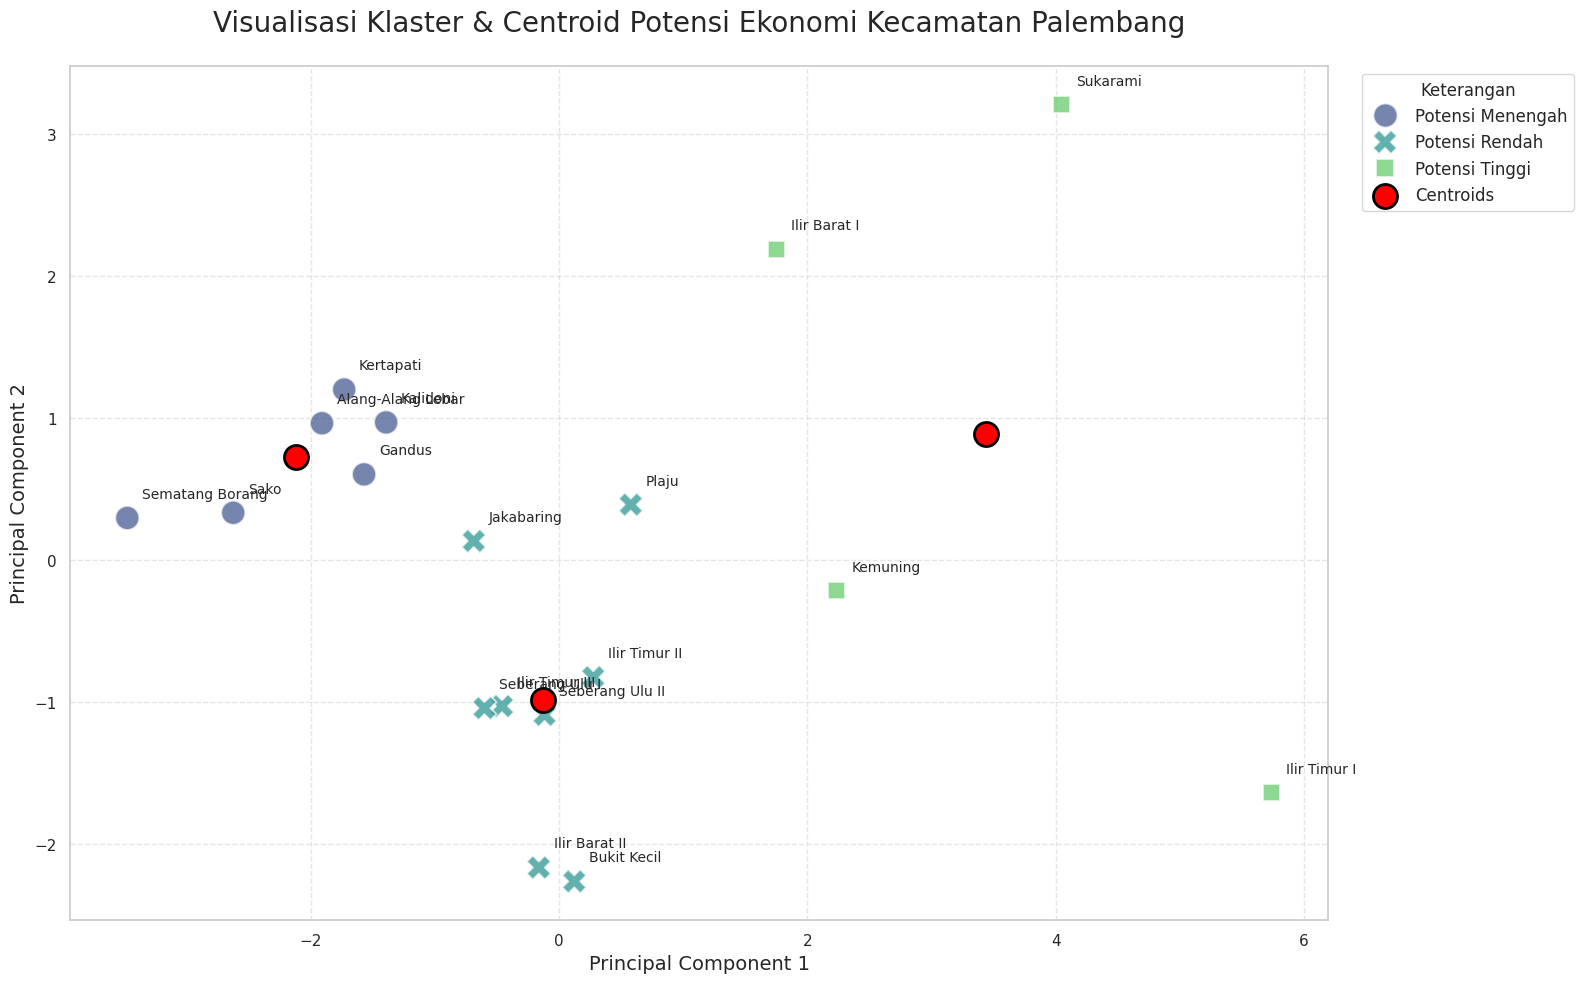

In [124]:
# 1. Reduksi Dimensi Data Kecamatan
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
df_pca['Kecamatan'] = df['Kecamatan']
df_pca['Kategori'] = df['Kategori_Potensi']

# 2. Transformasi Titik Centroid ke dalam PCA
centroids_10d = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids_10d)

# 3. Pengaturan Kanvas
plt.figure(figsize=(16, 10), dpi=100)

# 4. Plot Data Kecamatan
scatter = sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Kategori',
    style='Kategori',
    s=300,
    palette='viridis',
    alpha=0.7,
    edgecolor='w'
)

# 5. Plot Titik Centroid
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='o',
    s=300,
    c='red',
    label='Centroids',
    edgecolor='black',
    linewidth=2,
    zorder=10
)

# 6. Menambahkan Label Nama Kecamatan
for i in range(df_pca.shape[0]):
    plt.text(
        df_pca.PC1[i] + 0.12,
        df_pca.PC2[i] + 0.12,
        df_pca.Kecamatan[i],
        fontsize=10,
        ha='left',
        va='bottom'
    )

# 7. Estetika Grafik
plt.title('Visualisasi Klaster & Centroid Potensi Ekonomi Kecamatan Palembang', fontsize=20, pad=25)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Keterangan', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## **Eksport**

In [125]:
import joblib

# Menyimpan model KMeans
joblib.dump(kmeans, 'model_kmeans_potensiekonomi.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'scaler_potensiekonomi.pkl')

['scaler_potensiekonomi.pkl']